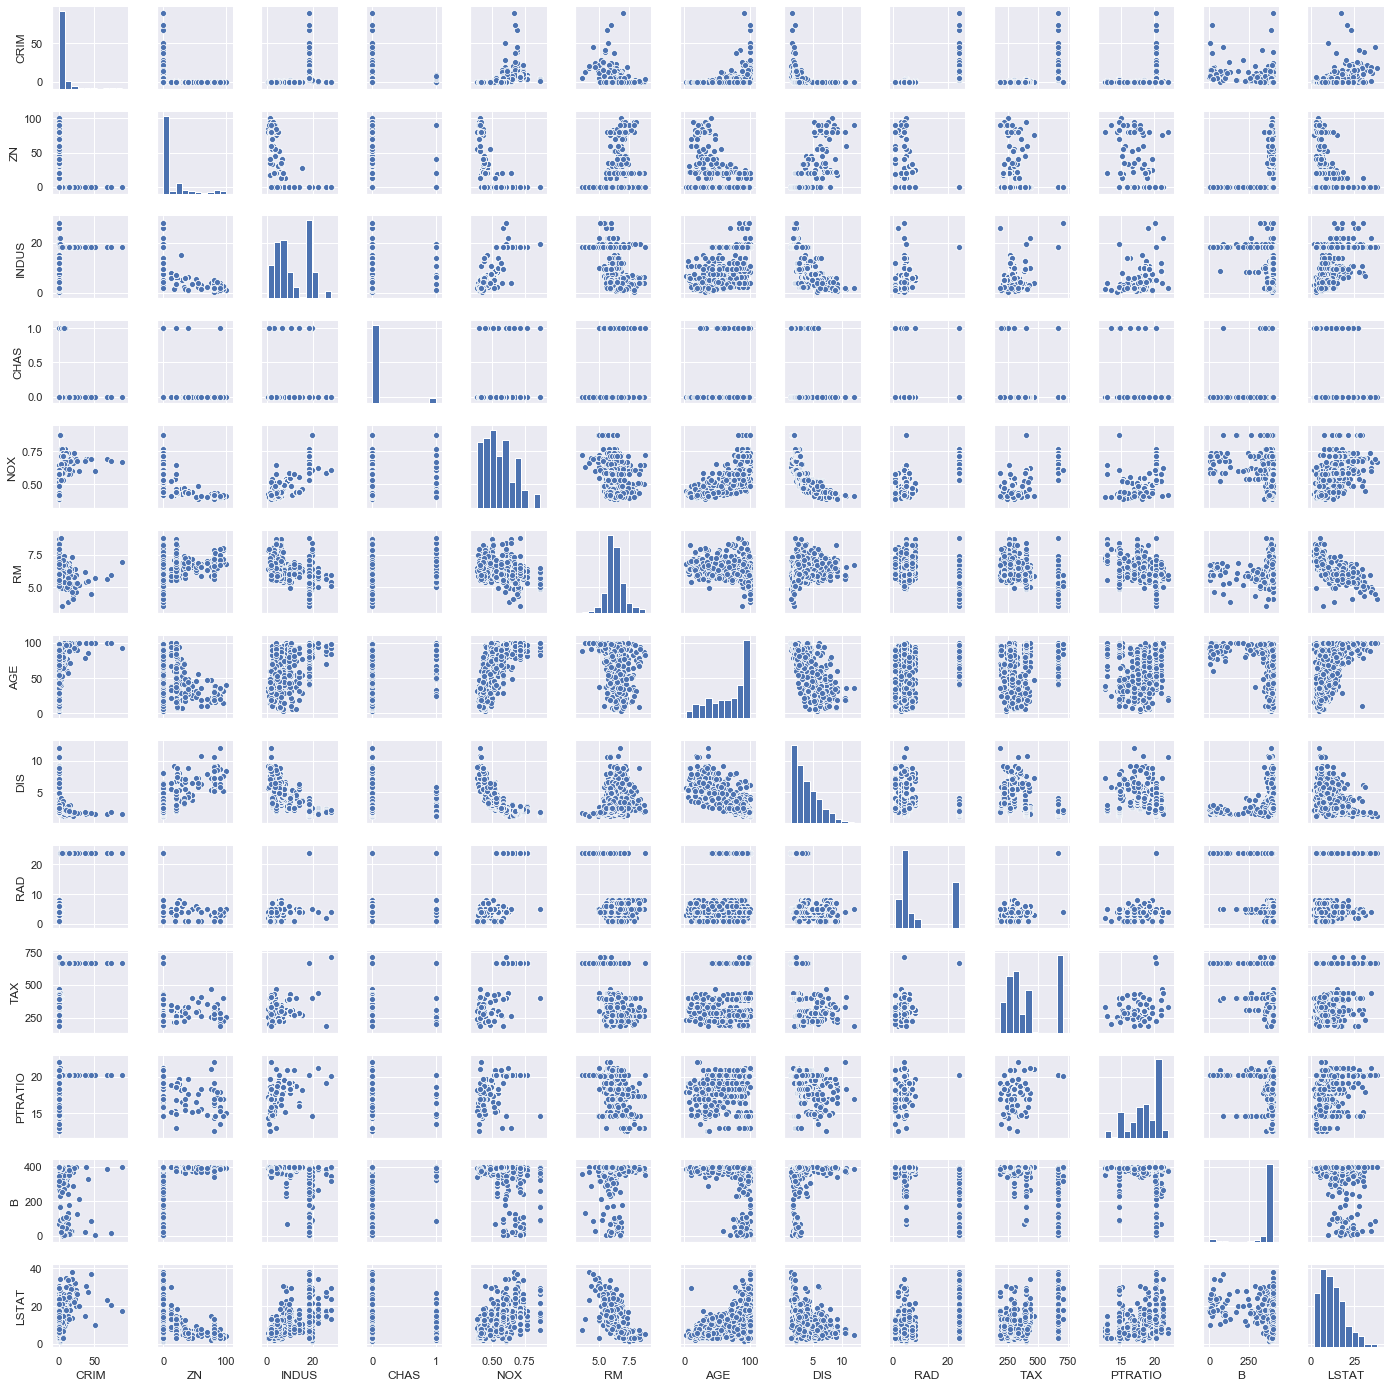

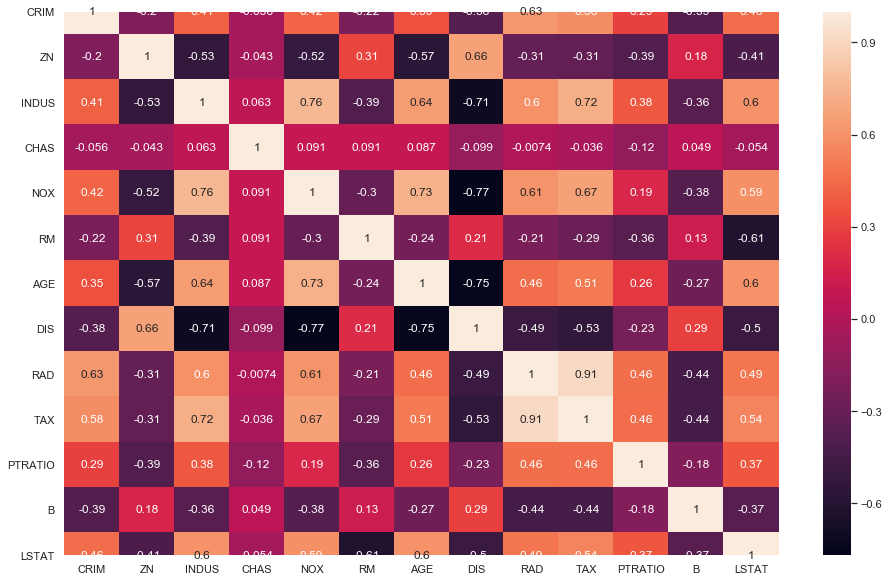

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# Pairwise distribution
sns.pairplot(df, height=1.5);
plt.show()

# Correlation
pd.options.display.float_format = '{:,.2f}'.format
df.corr()

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()


Intercept: -34.67062077643857    Coefficients: [9.10210898]


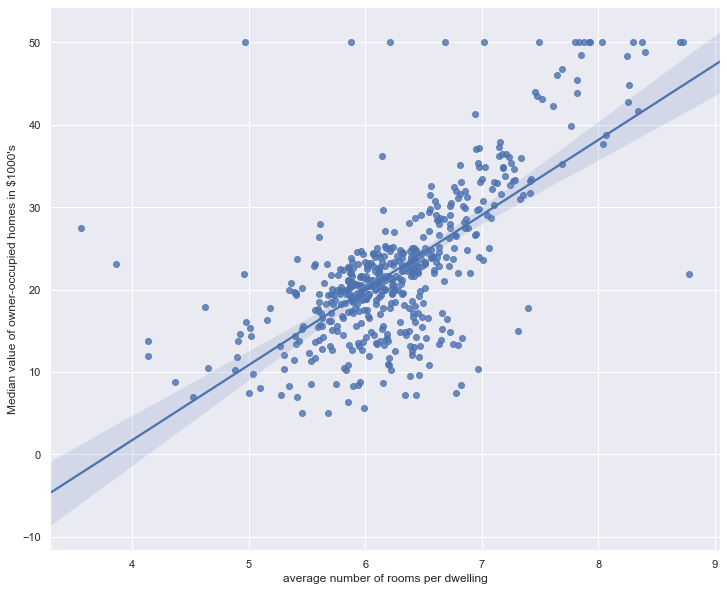

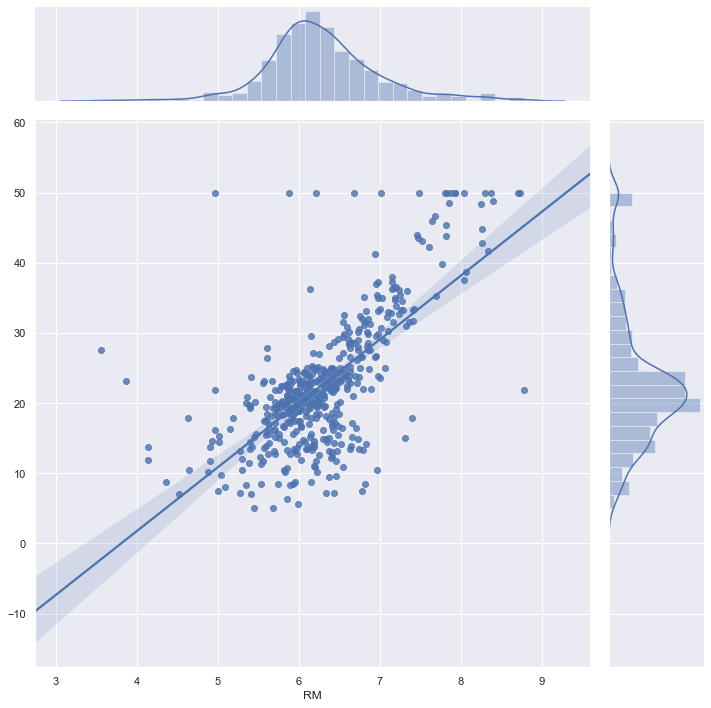

In [38]:
X = df['RM'].values.reshape(-1,1)
y = boston_data.target

# Ordinary Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print( 'Intercept: {}    Coefficients: {}'.format(model.intercept_, model.coef_) )

plt.figure(figsize=(12,10));
sns.regplot(X, y)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

# Joint plot
sns.jointplot(x='RM', y=y, data=df, kind='reg', height=10)
plt.show()

# ADD DIAGNOSTIC TESTS...............
# standaized residuals distribution
# Residual correlation - Durbin Watson


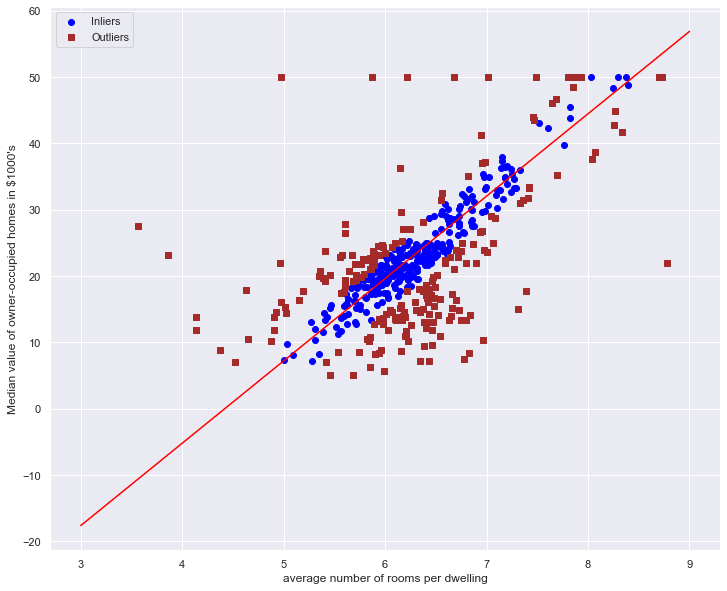

Intercept: -54.87776926121381    Coefficients: [12.41485457]


In [39]:
# Robust Regression
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

print( 'Intercept: {}    Coefficients: {}'.format(ransac.estimator_.intercept_, ransac.estimator_.coef_) )



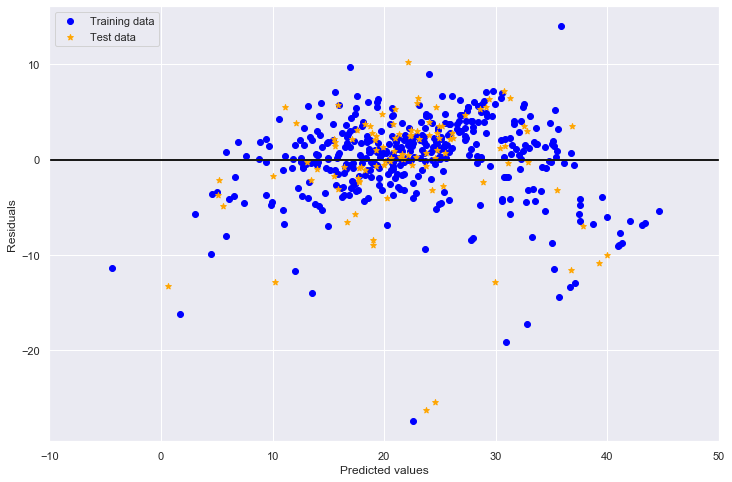

Train MSE: 19.32647020358573   Test MSE: 33.44897999767639
Train R2: 0.7730135569264233   Test R2: 0.5892223849182525


In [40]:
# Model Evaluation
from sklearn.model_selection import train_test_split

# Response variable is at the rightmost column
X = df.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Residual Analysis
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Mean Squared Error (MSE):
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, y_train_pred)
MSE_test = mean_squared_error(y_test, y_test_pred)
print('Train MSE: {}   Test MSE: {}'.format(MSE_train, MSE_test))    

# Coefficient of Determination, R^2:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Train R2: {}   Test R2: {}'.format(r2_train, r2_test))    


## Preprocessing

Mean is removed. Data is centered on zero. This is to remove bias.

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. "standard normal" random variable with mean 0 and standard deviation 1.

$$X'=\frac{X-\bar{X}}{\sigma}$$

In [81]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Min-Max or Scaling Features to a Range

Scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.

The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.

In [ ]:
minmax_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax_scaled = minmax_scaler.transform(X_train)
X_test_minmax_scaled = minmax_scaler.transform(X_test)


# MaxAbsScaler

Works in a very similar fashion, but scales in a way that the training data lies within the range `[-1, 1]` by dividing through the largest maximum value in each feature. It is meant for data that is already centered at zero or sparse data.

In [83]:
max_abs_scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_train_maxabs_scaled = max_abs_scaler.transform(X_train)
X_test_maxabs_scaled = max_abs_scaler.transform(X_test)


In [84]:
# There are other methods in Anthony Ng's course which I did not list here


In [42]:
# Alternative to Scikit Learn is Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = df
y = boston_data.target

X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lr = model.fit()
lr.summary()


C:\Users\bora\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 11 Jan 2020   Prob (F-statistic):          6.72e-135
Time:                        17:54:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.


**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.

## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score. 

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero.

**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results

In [43]:
# NEED TO CHECK 3BLUE1BROWN WEBSITE FOR EIGENVALUE EIGENVECTOR
# cmu paper on multicollinearity
# need to remember why we are doing it this way...

eigenvalues, eigenvectors = np.linalg.eig(df.corr())
pd.Series(eigenvalues).sort_values()
# Small eigenvalue represents presence of multicollinearity

np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)
# Elements with high loading wrt to the element with smallest eigenvalue are causing the multicollinearity


9    0.72
8    0.63
2    0.25
1    0.08
0    0.05
5    0.05
4    0.04
6    0.04
3    0.04
12   0.02
10   0.02
7    0.02
11   0.00
dtype: float64

In [44]:
# Once you eliminate multicollinearity, you can decide on features based on R2

# Eliminate one feature at a time to see its impact on R2
# No change indicates that it is not an important feature


In [45]:
# Regularized Method for Regression
# Penalize residual sum of squares
  # Ridge Regession   --- L2 norm
  # Least Absolute Shrinkage and Selection Operator (LASSO)  --- L1 norm
  # Elastic Net  ----- L1 and L2 norm

    
    


Linear Regression Coefficient Estimate:  [1.50556072]


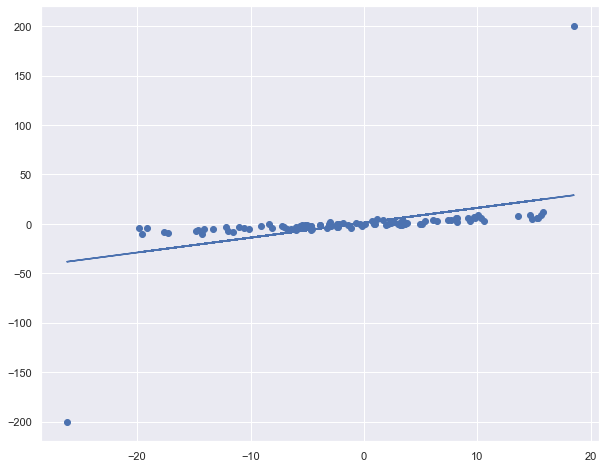

In [46]:
# Simple case to compare regularized regression with ordinary linear regression

np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples)

# Add an outlier
idx = rng.argmax()
y_gen[idx] = 200
idx = rng.argmin()
y_gen[idx] = -200

lr = LinearRegression()
lr.fit(rng.reshape(-1, 1), y_gen)
model_pred = lr.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Linear Regression Coefficient Estimate: ", lr.coef_)


* [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Least Absolute Shrinkage and Selection Operator (LASSO)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Ridge Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

Ridge Regression Coefficient Estimate:  [1.00370714]


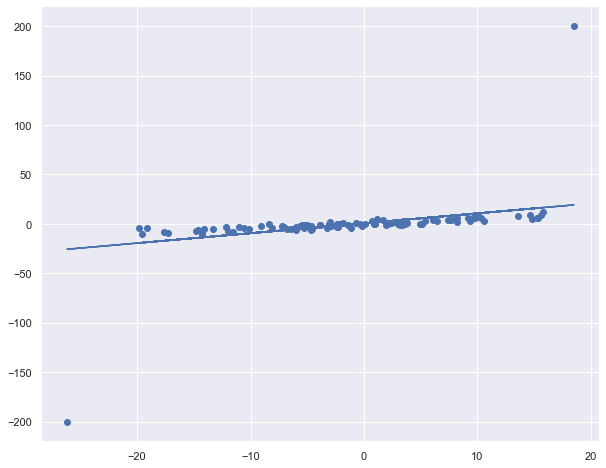

In [47]:
from sklearn.linear_model import Ridge

ridge_mod = Ridge(alpha=0.5, normalize=True)
ridge_mod.fit(rng.reshape(-1, 1), y_gen)
ridge_model_pred = ridge_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Ridge Regression Coefficient Estimate: ", ridge_mod.coef_)


## LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.

Coefficient Estimate:  [1.06289489]


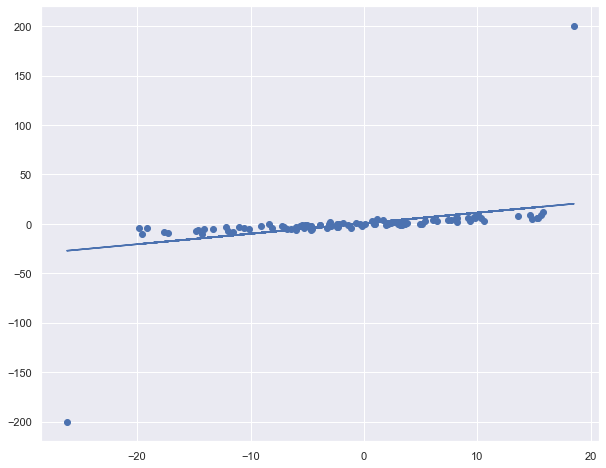

In [48]:
from sklearn.linear_model import Lasso

lasso_mod = Lasso(alpha=0.4, normalize=True)
lasso_mod.fit(rng.reshape(-1, 1), y_gen)
lasso_model_pred = lasso_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", lasso_mod.coef_)

## Elastic Net Regression

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$


Coefficient Estimate:  [0.74724704]


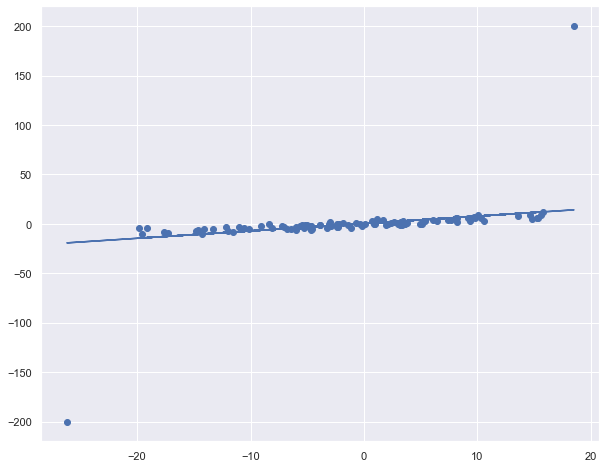

In [49]:
from sklearn.linear_model import ElasticNet

en_mod = ElasticNet(alpha=0.02, normalize=True)
en_mod.fit(rng.reshape(-1, 1), y_gen)
en_model_pred = en_mod.predict(rng.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", en_mod.coef_)

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**When should I use Lasso, Ridge or Elastic Net?**

Ridge regression can't zero out coefficients; You either end up including all the coefficients in the model, or none of them. 

LASSO does both parameter shrinkage and variable selection automatically. 

If some of your covariates are highly correlated, you may want to look at the Elastic Net instead of the LASSO.

# Other References

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

## Adding Polynomial Terms

In [98]:
np.random.seed(42)
n_samples = 100

X_toy = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y_toy = X_toy ** 3 + rng + 100


0.9173858308909386


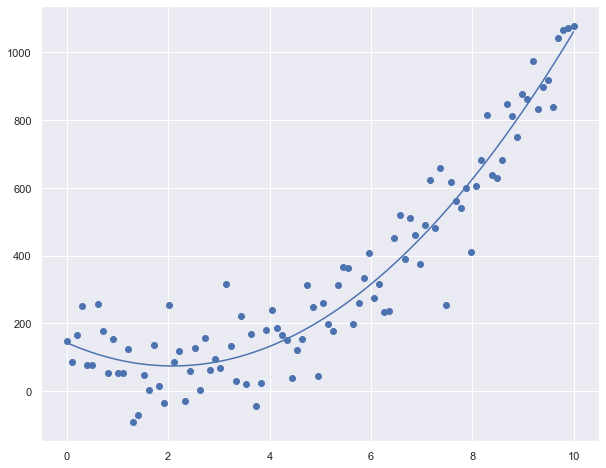

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_toy.reshape(-1, 1))

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_toy.reshape(-1, 1))
y_pred = lin_reg.predict(X_poly)

plt.figure(figsize=(10,8));
plt.scatter(X_toy, y_toy);
plt.plot(X_toy, y_pred);
print(r2_score(y_toy, y_pred))

## Decision Trees

In [73]:
X = df.values
y = boston_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 15.4403, test: 15.2458
R^2 train: 0.8243, test: 0.7954


## Random Forests

In [59]:
X = df.values
y = boston_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=42, n_jobs=-1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 1.8700, test: 9.3921
R^2 train: 0.9787, test: 0.8740


## AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

ada.fit(X_train, y_train)

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 4.6605, test: 13.4949
R^2 train: 0.9470, test: 0.8189


# Scikit Learn can help with feature selection

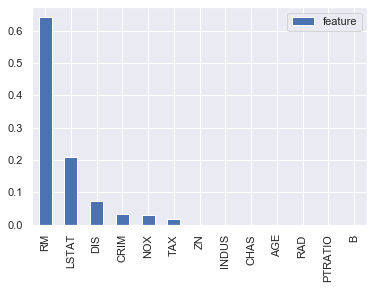

In [74]:
tree.feature_importances_

result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']

result.sort_values(by='feature', ascending=False)
result.sort_values(by='feature', ascending=False).plot(kind='bar');

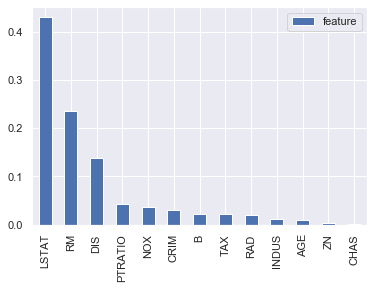

In [65]:
ada.feature_importances_

result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

result.sort_values(by='feature', ascending=False)
result.sort_values(by='feature', ascending=False).plot(kind='bar');

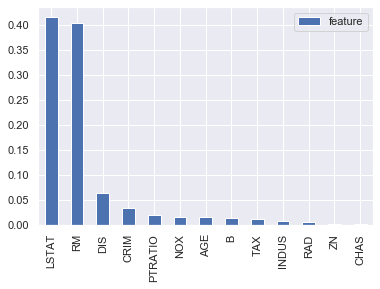

In [66]:
forest.feature_importances_

result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']

result.sort_values(by='feature', ascending=False)
result.sort_values(by='feature', ascending=False).plot(kind='bar');

## Validation Curve

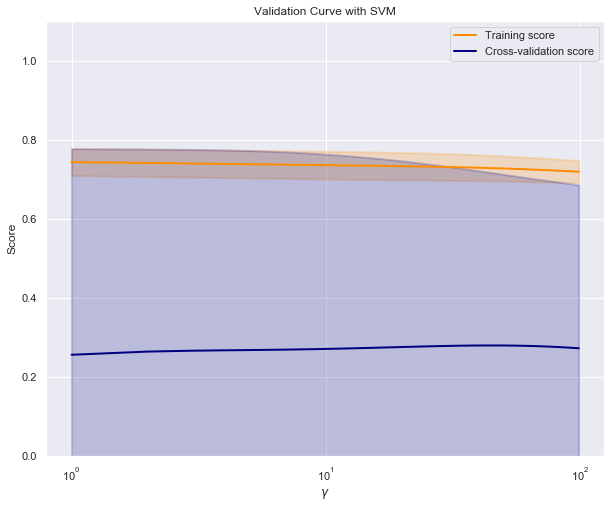

In [108]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,5,1)
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, param_name="max_depth", param_range=param_range, cv=10, n_jobs=1)

#param_range = np.arange(1,10,1)
#train_scores, test_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=param_range, cv=10, n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

## Learning Curve

* Shows the validation and training score of an estimator for varying numbers of training samples. 

* A tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. 

* If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data. 


In [100]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


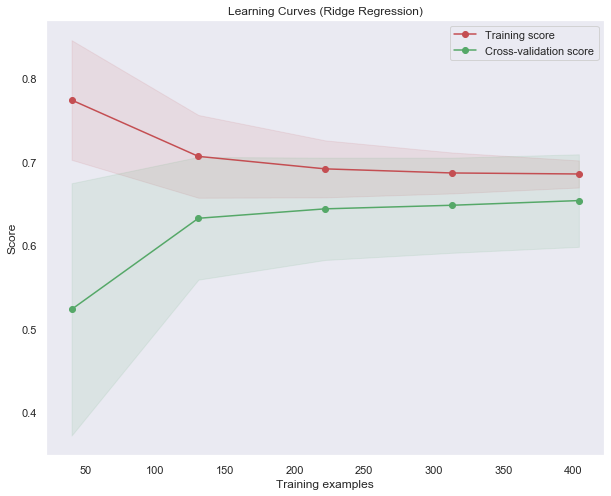

In [103]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = Ridge()
title = "Learning Curves (Ridge Regression)"
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

## Cross Validation

In [128]:
X = df.values
y = boston_data.target

from sklearn import svm
from sklearn.model_selection import cross_val_score
#from sklearn import metrics

#regression = svm.SVR(kernel='linear', C=1)
ridge_mod = Ridge(alpha=0.5, normalize=True)
scores = cross_val_score(ridge_mod, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

#scores = cross_val_score(ridge_mod, X, y, cv=5, scoring='neg_mean_squared_error')




Accuracy: 0.48 (+/- 0.18)


In [118]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))
    
    

[2 3] [0 1]
[0 1] [2 3]


In [119]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


## Pipelines (Need to learn more)

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import make_pipeline

pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        svm.SVR(kernel='linear', C=1))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.434


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_svm,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

## Logistic Regression

In [142]:
from sklearn.linear_model import LogisticRegression

dataset = [[-2.0011, 0],
           [-1.4654, 0],
           [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]

X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver='lbfgs')
clf_LR.fit(X,y)

# Find predictions for all inputs
#print( 'Predictions: {}'.format(clf_LR.predict(X)))
#print( 'Pedicted Probabilities: ')
#clf_LR.predict_proba(X)

# Find prediction for a single input
print(clf_LR.predict_proba(np.array([9]).reshape(1,-1)))
print(clf_LR.predict(np.array([9]).reshape(1,-1)))

[[0.00543525 0.99456475]]
[1.]


(70000, 784) (70000,)


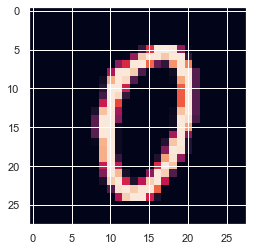

In [149]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')


(70000, 784) (70000,)


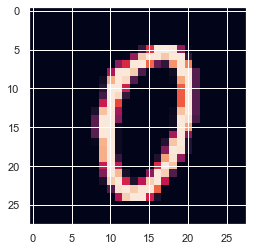

In [150]:
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)
y = y.astype("float")
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image);


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)


In [152]:
# Zero vs non-Zero classifier
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [171]:
# For some reason logistic regression did not converge
clf = LogisticRegression(C=1.0, penalty='l2', tol=0.0001, solver='newton-cg')
clf.fit(X_train,y_train_0)

print(clf.predict_proba(X[1000].reshape(1,-1)))
print(clf.predict(np.array(X[1000]).reshape(1,-1)))


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [194]:
# Instead of lgistic regression, we use another classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

print( clf.decision_function(X[1000].reshape(1, -1)) )
print( clf.predict(np.array(X[1000]).reshape(1,-1)) )


[16072.45616058]
[ True]


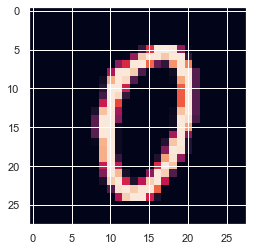

In [180]:
_image = X[1000].reshape(28, 28)
plt.imshow(_image);

In [181]:
#Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98708952, 0.98987518, 0.9877317 ])

In [182]:
1 - sum(y_train_0) / len(y_train_0)

0.9007142857142857

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

In [190]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

pd.DataFrame( confusion_matrix(y_train_0, y_train_pred), 
             columns=pd.MultiIndex.from_product([['Prediction'], ['Negative', 'Positive']]),
               index=pd.MultiIndex.from_product([['Actual'], ['Negative', 'Positive']]))

Prediction         
                  Negative Positive
Actual Negative      50092      348
       Positive        311     5249

In [193]:
from sklearn.metrics import precision_score, recall_score, f1_score
print( 'Precision: ', precision_score(y_train_0, y_train_pred) ) # accuracy of positive predictions
print( 'Recall: ', recall_score(y_train_0, y_train_pred) ) # Ratio of positive instances that are correctly detected by the classifier
print( 'F1 score: ', f1_score(y_train_0, y_train_pred) ) # harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values

Precision:  0.9378238341968912
Recall:  0.9440647482014388
F1 score:  0.9409339428161692


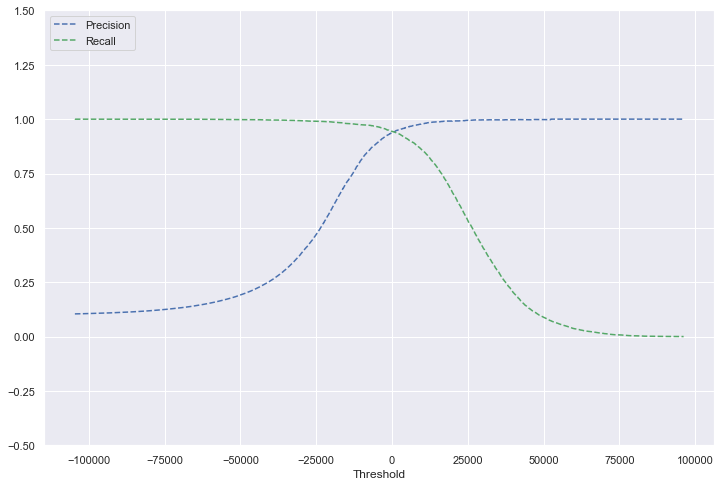

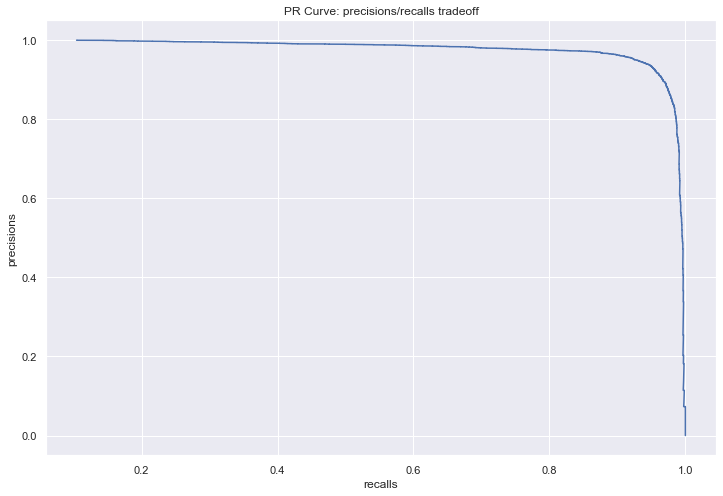

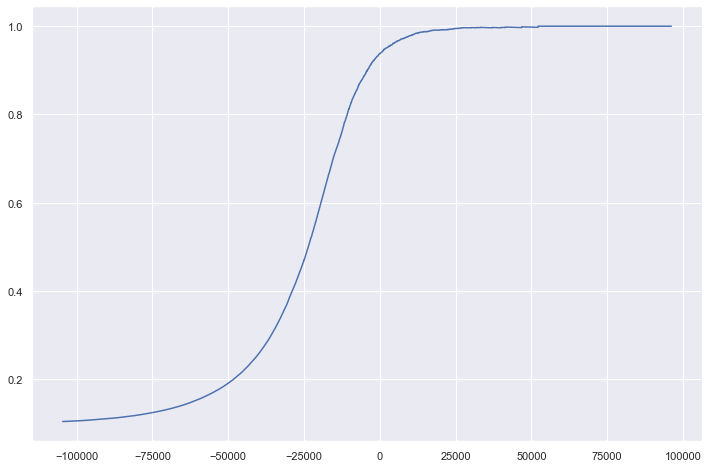

In [199]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    
    
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

plt.figure(figsize=(12,8)); 
plt.plot(thresholds, precisions[1:]);
plt.show()       

In [203]:
idx = len(precisions[precisions < 0.9])-1
y_train_pred_90 = (y_scores > thresholds[idx])
print( 'Precision score:', precision_score(y_train_0, y_train_pred_90) )
print( 'Recall score:', recall_score(y_train_0, y_train_pred_90) )

Precision score: 0.9000841042893187
Recall score: 0.962410071942446


In [204]:
idx = len(recalls[recalls > 0.9])
y_train_pred_90 = (y_scores > thresholds[idx])
print( 'Precision score:', precision_score(y_train_0, y_train_pred_90) )
print( 'Recall score:', recall_score(y_train_0, y_train_pred_90) )

Precision score: 0.9669565217391304
Recall score: 0.9


## The Receiver Operating Characteristics (ROC) Curve

ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

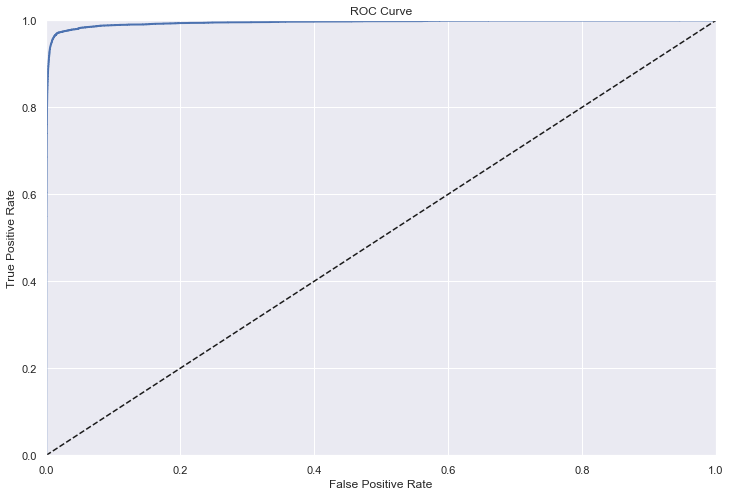

In [205]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives